In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
sns.set_theme()

In [31]:
df = pd.read_csv('dataset/default of credit card clients.csv')
df.columns = df.iloc[0]
df = df[1:].drop(labels=['ID'],axis=1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                       30000 non-null  object
 8   PAY_4                       30000 non-null  object
 9   PAY_5                       30000 non-null  object
 10  PAY_6                       30000 non-null  object
 11  BILL_AMT1                   30000 non-null  object
 12  BILL_AMT2                   30000 non-null  object
 13  BILL_AMT3                   30000 non-null  ob

In [39]:
for col in df.columns:
    print(f'{col} : {len(set(df[col]))}')

LIMIT_BAL : 81
SEX : 2
EDUCATION : 7
MARRIAGE : 4
AGE : 56
PAY_0 : 11
PAY_2 : 11
PAY_3 : 11
PAY_4 : 11
PAY_5 : 10
PAY_6 : 10
BILL_AMT1 : 22723
BILL_AMT2 : 22346
BILL_AMT3 : 22026
BILL_AMT4 : 21548
BILL_AMT5 : 21010
BILL_AMT6 : 20604
PAY_AMT1 : 7943
PAY_AMT2 : 7899
PAY_AMT3 : 7518
PAY_AMT4 : 6937
PAY_AMT5 : 6897
PAY_AMT6 : 6939
default payment next month : 2


In [47]:
df = df.astype(np.float64)
# df.iloc[:,1:11] = df.iloc[:,1:11].astype(np.int64)
for i in range(10):
    df[df.columns[i+1]] = df[df.columns[i+1]].astype(np.int64)
df[df.columns[-1]] = df[df.columns[-1]].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [14]:
has_nan = df.isna().any().any()
if has_nan:
    print("The DataFrame contains NaN values.")
else:
    print("The DataFrame does not contain any NaN values.")

The DataFrame does not contain any NaN values.


In [17]:
# Verifying whether there are columns containing only one unique value, as they will have no impact on our analysis.

In [19]:
len(df.nunique(dropna=True))

25

In [49]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [51]:
df.iloc[:,1:4].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [59]:
df.iloc[:,5:11].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [54]:
df.iloc[:,11:17].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [55]:
df.iloc[:,17:23].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [66]:
print(df.iloc[:,0].describe())
print()
print(df.iloc[:,23].describe())

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: def_pay, dtype: float64


In [61]:
df = df.rename(columns={'default payment next month': 'def_pay', 'PAY_0': 'PAY_1'})
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29999,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [70]:
print(f"{df['def_pay'].sum()/300}% of the def_pay is 1")

22.12% of the def_pay is 1


In [75]:
print("--------------------------------------")
for i in range(3):
    print(df.iloc[:,i+1:i+2].value_counts())
    print("--------------------------------------")

--------------------------------------
SEX
2      18112
1      11888
dtype: int64
--------------------------------------
EDUCATION
2            14030
1            10585
3             4917
5              280
4              123
6               51
0               14
dtype: int64
--------------------------------------
MARRIAGE
2           15964
1           13659
3             323
0              54
dtype: int64
--------------------------------------


--------------------------------------
SEX
2      18112
1      11888
dtype: int64
--------------------------------------
EDUCATION
2            14030
1            10585
3             4917
5              280
4              123
6               51
0               14
dtype: int64
--------------------------------------
MARRIAGE
2           15964
1           13659
3             323
0              54
dtype: int64
--------------------------------------


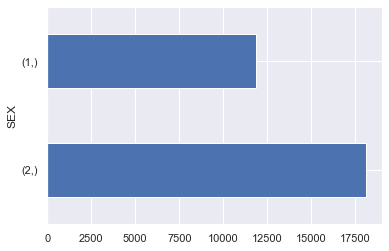

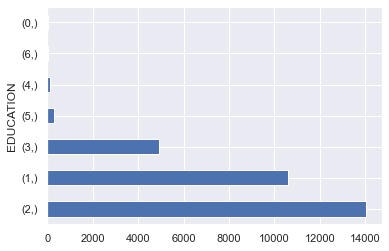

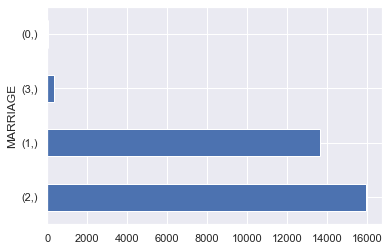

In [84]:
print("--------------------------------------")
for i in range(3):
    print(df.iloc[:,i+1:i+2].value_counts())
    print("--------------------------------------")

for i in range(3):
    df.iloc[:,i+1:i+2].value_counts().plot(kind = 'barh')
    plt.show()

--------------------------------------
PAY_1
 0       14737
-1        5686
 1        3688
-2        2759
 2        2667
 3         322
 4          76
 5          26
 8          19
 6          11
 7           9
dtype: int64
--------------------------------------
PAY_2
 0       15730
-1        6050
 2        3927
-2        3782
 3         326
 4          99
 1          28
 5          25
 7          20
 6          12
 8           1
dtype: int64
--------------------------------------
PAY_3
 0       15764
-1        5938
-2        4085
 2        3819
 3         240
 4          76
 7          27
 6          23
 5          21
 1           4
 8           3
dtype: int64
--------------------------------------
PAY_4
 0       16455
-1        5687
-2        4348
 2        3159
 3         180
 4          69
 7          58
 5          35
 6           5
 1           2
 8           2
dtype: int64
--------------------------------------
PAY_5
 0       16947
-1        5539
-2        4546
 2        2626
 3 

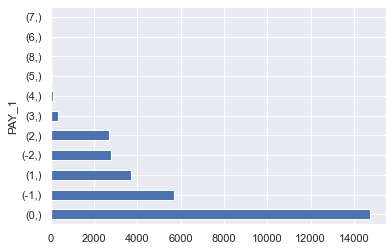

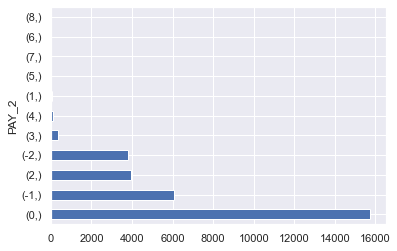

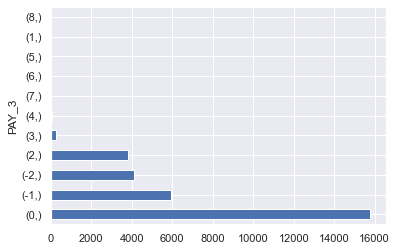

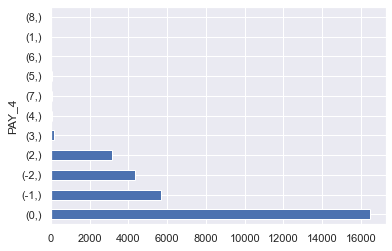

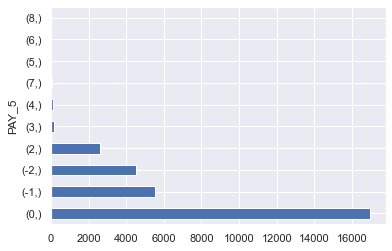

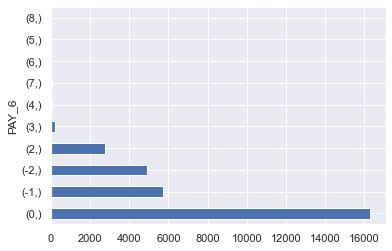

In [96]:
print("--------------------------------------")
for i in range(6):
    print(df.iloc[:,i+5:i+6].value_counts())
    print("--------------------------------------")


for i in range(6):
    df.iloc[:,i+5:i+6].value_counts().plot(kind = 'barh')
    plt.show()

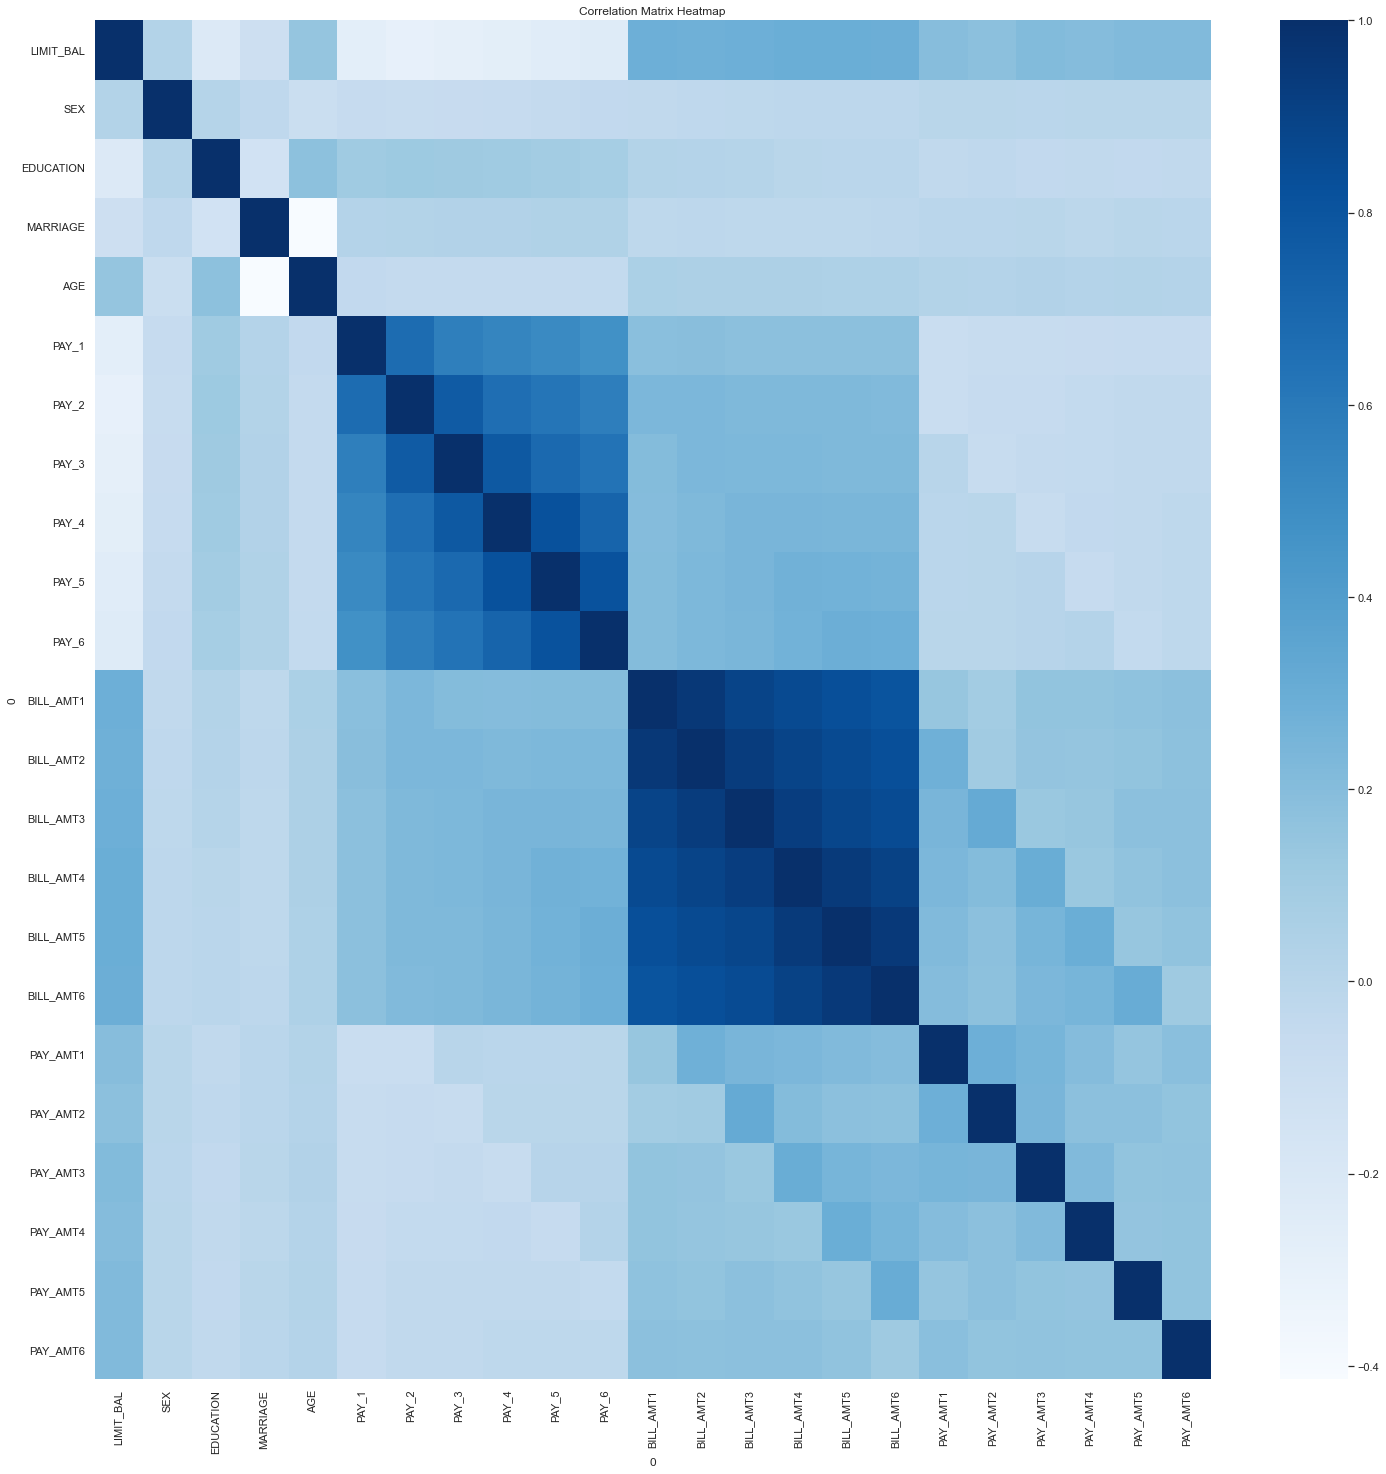

In [97]:
cor=df.iloc[:,:-1].corr()
plt.figure(figsize=(25,25))
sns.heatmap(cor, cmap='Blues')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [99]:
cor = df.iloc[:,:-1].corr()
# Convert the correlation matrix into a Series
cor_series = cor.unstack()
# Sort the correlation values in descending order
sorted_cor = cor_series.sort_values(ascending=False)
# Filter out the pairs with perfect correlation (correlation of 1) and self-correlations
sorted_cor = sorted_cor[(sorted_cor < 1) & (sorted_cor > -1)]
sorted_cor

BILL_AMT1  BILL_AMT2    0.951484
BILL_AMT2  BILL_AMT1    0.951484
BILL_AMT6  BILL_AMT5    0.946197
BILL_AMT5  BILL_AMT6    0.946197
BILL_AMT4  BILL_AMT5    0.940134
                          ...   
LIMIT_BAL  PAY_3       -0.286123
PAY_2      LIMIT_BAL   -0.296382
LIMIT_BAL  PAY_2       -0.296382
MARRIAGE   AGE         -0.414170
AGE        MARRIAGE    -0.414170
Length: 506, dtype: float64

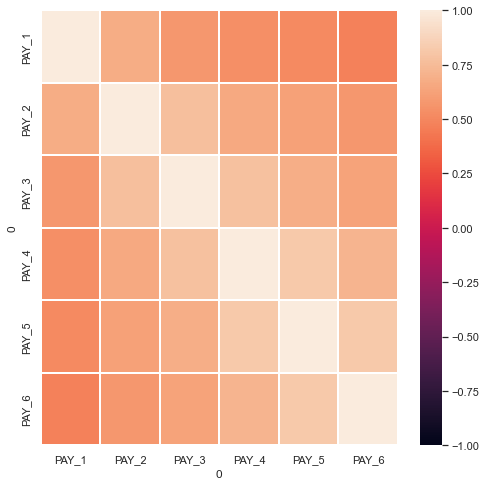

In [108]:
var = ['PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (8,8))
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

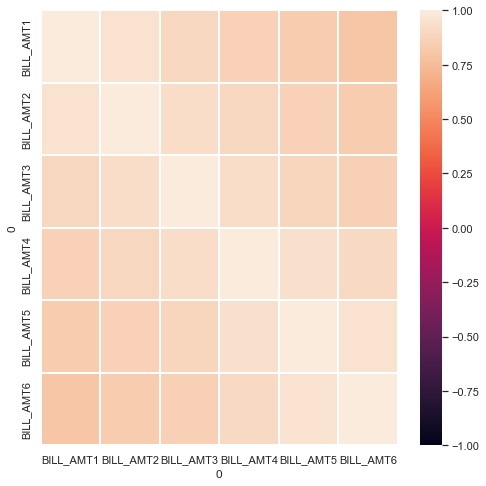

In [109]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,8))
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

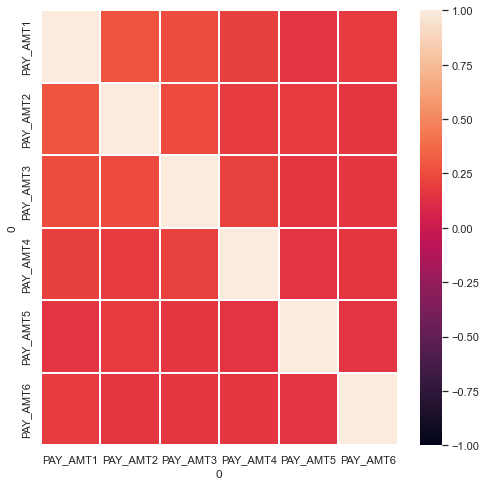

In [110]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize = (8,8))
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

In [132]:
def boxplot_variation(feature1, feature2, feature3, width=16, type_="box"):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    if(type_=="box"):
        s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                    data=df, palette="PRGn",showfliers=False)
    else:
        s = sns.violinplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
            data=df, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()

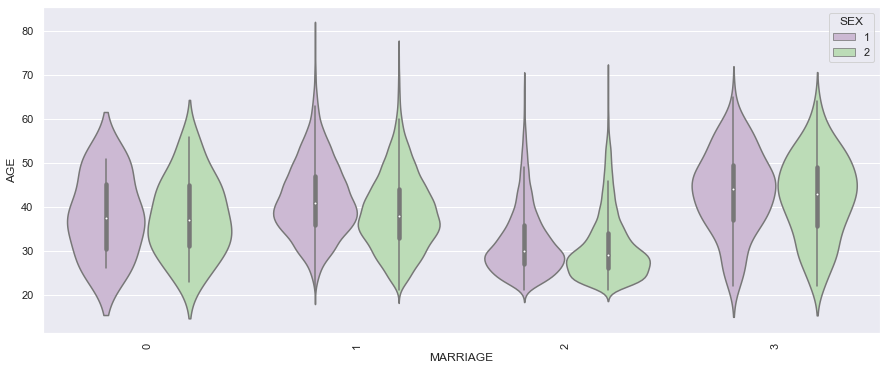

In [133]:
boxplot_variation('MARRIAGE','AGE', 'SEX',15,type_="violin")

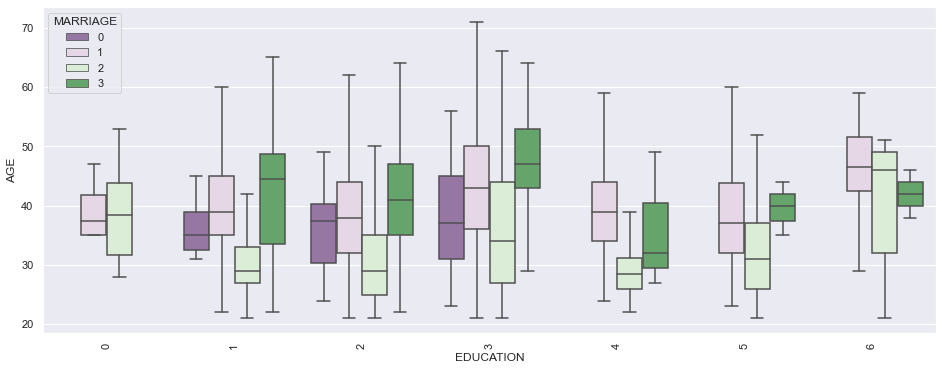

In [134]:
boxplot_variation('EDUCATION','AGE', 'MARRIAGE',16)

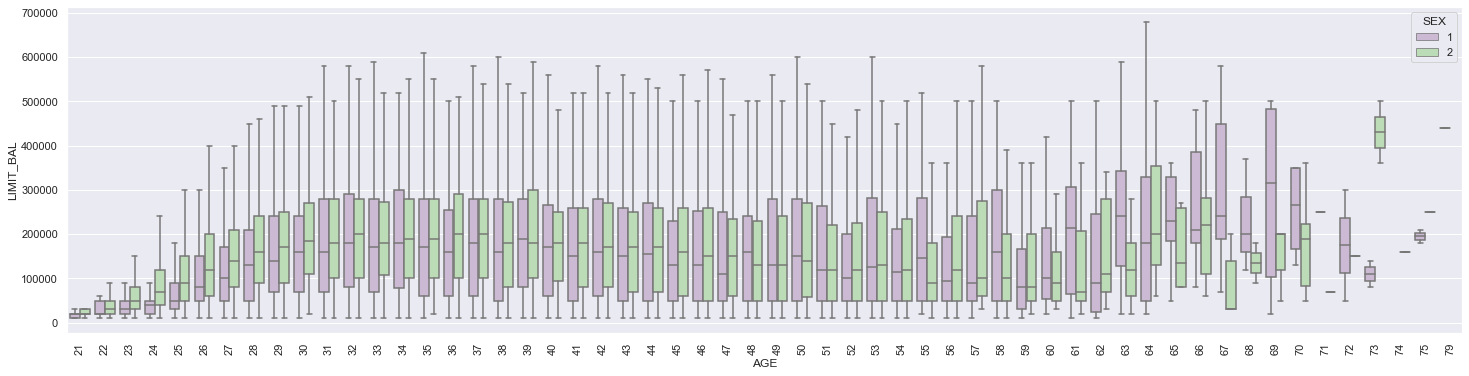

In [135]:
boxplot_variation('AGE','LIMIT_BAL', 'SEX',25)

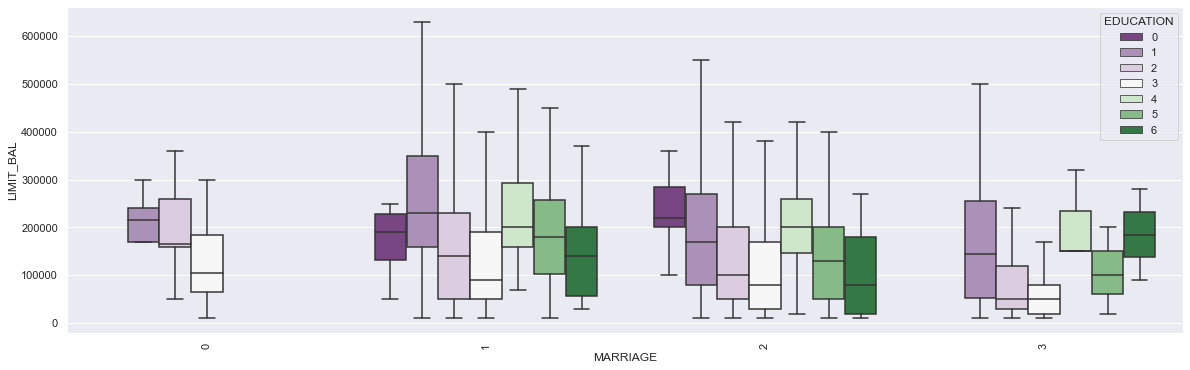

In [136]:
boxplot_variation('MARRIAGE','LIMIT_BAL', 'EDUCATION',20)

In [138]:
# THE BELOW DATA WAS GIVEN DURING THE DATASET DESCRIPTION:
# LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
# SEX: Gender (1=male, 2=female)
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
# MARRIAGE: Marital status (1=married, 2=single, 3=others)

In [141]:
# We can group categories 4,5, and 6 as 'others'
# We can group categories 4,5, and 6 as 'others'

In [142]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [143]:
# split test train data python with equal ratio of classes

In [146]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Split the data with an equal ratio of classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [178]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# DecisionTreeClassifier

In [153]:
classifier = DecisionTreeClassifier(max_depth=10, random_state=42) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.8106666666666666

In [154]:
classifier = DecisionTreeClassifier(max_depth=100, random_state=42) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.7158333333333333

In [159]:
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

classifier = DecisionTreeClassifier(max_depth=100, criterion='entropy', random_state=42) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.72

In [160]:
classifier = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=42) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.8148333333333333

In [161]:
classifier = DecisionTreeClassifier(max_depth=8, criterion='entropy',max_leaf_nodes=20, random_state=42) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.8161666666666667

In [164]:
classifier = DecisionTreeClassifier(max_depth=8, criterion='entropy',max_leaf_nodes=20,min_samples_split=5, random_state=42) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

classifier = DecisionTreeClassifier(max_depth=8, criterion='entropy',max_leaf_nodes=20,min_samples_split=25, random_state=42) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))


0.8161666666666667
0.8161666666666667


In [166]:
classifier = DecisionTreeClassifier(max_depth=8, criterion='entropy',max_leaf_nodes=10,min_samples_split=5, random_state=42) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

classifier = DecisionTreeClassifier(max_depth=8, criterion='entropy',max_leaf_nodes=10, random_state=42) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.8168333333333333
0.8168333333333333


In [177]:
## BEST MODEL for DecisionTreeClassifier

In [183]:
decision_classifier = DecisionTreeClassifier(max_depth=8, criterion='gini',max_leaf_nodes=20, random_state=42) 
decision_classifier.fit(X_train, y_train)
predictions = decision_classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.8186666666666667


In [176]:
classifier = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=42) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.8171666666666667


In [179]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [180]:
classifier = DecisionTreeClassifier(max_depth=8, criterion='gini',max_leaf_nodes=20, random_state=42) 
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.8186666666666667


In [182]:
# STANDARDSCALER MAKING NO DIFFERENCE AT ALL

# RandomForestClassifier

In [184]:
from sklearn.ensemble import RandomForestClassifier

In [196]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.8125


In [201]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.8125


In [193]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.805


In [194]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.8046666666666666


In [188]:
# param_grid = {
#     'n_estimators': [50, 100, 150],           # Number of trees in the forest
#     'criterion': ['gini', 'entropy'],         # Split criterion
#     'max_depth': [None, 10, 20],              # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
#     'max_features': ['auto', 'sqrt']          # Number of features to consider when looking for the best split
# }

In [195]:
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.8111666666666667


In [198]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 42)
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.8133333333333334


In [205]:
# Best Performer :

In [203]:
randomForest_classifier = RandomForestClassifier(n_estimators = 100, max_depth=20, criterion = 'gini', random_state = 42)
randomForest_classifier.fit(X_train, y_train)
predictions = randomForest_classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.8178333333333333


In [204]:
classifier = RandomForestClassifier(n_estimators = 100, max_depth=20, criterion = 'gini', min_samples_leaf=4, random_state = 42)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.8143333333333334


# CLASSIFICATION PROBLEMS:

In [242]:
# LogisticRegression

In [217]:
from sklearn.linear_model import LogisticRegression

In [228]:
# param_grid = {
#     'penalty': ['l1', 'l2'],               # Regularization penalty (L1 or L2)
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],   # Inverse of regularization strength
#     'solver': ['liblinear', 'saga']        # Solver algorithm for optimization
# }

In [241]:
classifier = LogisticRegression(random_state = 42,penalty='l2',C=0.001,solver='lbfgs')
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
print(accuracy_score(y_true = y_test, y_pred = predictions))

classifier = LogisticRegression(random_state = 42,penalty='l2',C=0.01,solver='lbfgs')
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
print(accuracy_score(y_true = y_test, y_pred = predictions))

classifier = LogisticRegression(random_state = 42,penalty='l2',C=0.1,solver='lbfgs')
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
print(accuracy_score(y_true = y_test, y_pred = predictions))

classifier = LogisticRegression(random_state = 42,penalty='l2',C=1,solver='lbfgs')
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
print(accuracy_score(y_true = y_test, y_pred = predictions))

classifier = LogisticRegression(random_state = 42,penalty='l2',C=10,solver='lbfgs')
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
print(accuracy_score(y_true = y_test, y_pred = predictions))


#BEST FIT
logisticRegression_classifier = LogisticRegression(random_state = 42,penalty='l2',C=100,solver='lbfgs')
logisticRegression_classifier.fit(X_train_scaled, y_train)
predictions = logisticRegression_classifier.predict(X_test_scaled)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.8023333333333333
0.807
0.8078333333333333
0.8078333333333333
0.8078333333333333
0.808


In [240]:
classifier = LogisticRegression(random_state = 42,penalty='l1',C=0.001,solver='liblinear')
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
print(accuracy_score(y_true = y_test, y_pred = predictions))

classifier = LogisticRegression(random_state = 42,penalty='l1',C=0.01,solver='liblinear')
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
print(accuracy_score(y_true = y_test, y_pred = predictions))

classifier = LogisticRegression(random_state = 42,penalty='l1',C=0.1,solver='liblinear')
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
print(accuracy_score(y_true = y_test, y_pred = predictions))

classifier = LogisticRegression(random_state = 42,penalty='l1',C=1,solver='liblinear')
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
print(accuracy_score(y_true = y_test, y_pred = predictions))

classifier = LogisticRegression(random_state = 42,penalty='l1',C=10,solver='liblinear')
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
print(accuracy_score(y_true = y_test, y_pred = predictions))

classifier = LogisticRegression(random_state = 42,penalty='l1',C=100,solver='liblinear')
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.787
0.8066666666666666
0.8076666666666666
0.8078333333333333
0.8078333333333333
0.8078333333333333


In [244]:
# SVC

In [245]:
from sklearn.svm import SVC

In [247]:
# param_grid = {
#     'C': [0.1, 1, 10],                   # Regularization parameter
#     'kernel': ['linear', 'rbf', 'sigmoid'],   # Kernel type
#     'gamma': ['scale', 'auto', 0.1, 1]    # Kernel coefficient for 'rbf' and 'sigmoid'
# }

In [248]:
classifier = SVC(kernel='rbf',C=1.0,gamma='scale')
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.8163333333333334


In [249]:
classifier = SVC(kernel='linear',C=1.0,gamma='scale')
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.808


In [250]:
classifier = SVC(kernel='sigmoid',C=1.0,gamma='scale')
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.6963333333333334


# BOOSTERS:

In [221]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [215]:
# ADABOOST

In [211]:
classifier = AdaBoostClassifier(random_state=42,
                         algorithm='SAMME.R',
                         learning_rate=1,
                             n_estimators=5)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.8163333333333334


In [208]:
classifier = AdaBoostClassifier(random_state=42,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=5)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.8191666666666667


In [209]:
classifier = AdaBoostClassifier(random_state=42,
                         algorithm='SAMME',
                         learning_rate=0.8,
                             n_estimators=5)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.8191666666666667


In [210]:
classifier = AdaBoostClassifier(random_state=42,
                         algorithm='SAMME.R',
                         learning_rate=0.1,
                             n_estimators=5)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.8191666666666667


In [212]:
classifier = AdaBoostClassifier(random_state=42,
                         algorithm='SAMME.R',
                         learning_rate=0.01,
                             n_estimators=5)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.8191666666666667


In [213]:
classifier = AdaBoostClassifier(random_state=42,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=50)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.8171666666666667


In [214]:
classifier = AdaBoostClassifier(random_state=42,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=10)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.8186666666666667


In [222]:
# xgboost

In [227]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
predictions = xgb_classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.8141666666666667


In [252]:
# def feature_importance_plot(clf,):
#     tmp = pd.DataFrame({'Feature': predictors_f, 'Feature importance': clf.feature_importances_})
#     tmp = tmp.sort_values(by='Feature importance',ascending=False)
#     plt.figure(figsize = (16,4))
#     plt.title('Features importance',fontsize=14)
#     s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
#     s.set_xticklabels(s.get_xticklabels(),rotation=90)
#     plt.show()

In [253]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [260]:
def plot_cm(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [259]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      4673
           1       0.31      0.30      0.30      1327

    accuracy                           0.70      6000
   macro avg       0.56      0.55      0.55      6000
weighted avg       0.69      0.70      0.69      6000

